<a href="https://colab.research.google.com/github/KrupalVasani/Machine-Learning/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
from matplotlib import pyplot as plt

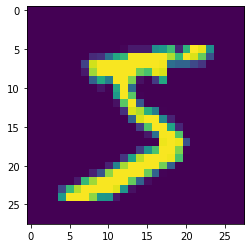

In [ ]:
plt.imshow(x_train[0])

Mnist is clean data set
and it is splitted in train and test  
so,we can start modeling part now 

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Here feature values are between 0-255 we should scale that to get faster convergence 

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:

#Create CNN

from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:

model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.11)

Epoch 1/10
1669/1669 [==============================] - 96s 57ms/step - loss: 0.1288 - accuracy: 0.9597 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 2/10
1669/1669 [==============================] - 95s 57ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0508 - val_accuracy: 0.9844
Epoch 3/10
1669/1669 [==============================] - 98s 59ms/step - loss: 0.0317 - accuracy: 0.9907 - val_loss: 0.0493 - val_accuracy: 0.9882
Epoch 4/10
1669/1669 [==============================] - 97s 58ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.0404 - val_accuracy: 0.9912
Epoch 5/10
1669/1669 [==============================] - 94s 56ms/step - loss: 0.0205 - accuracy: 0.9943 - val_loss: 0.0373 - val_accuracy: 0.9903
Epoch 6/10
1669/1669 [==============================] - 93s 56ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.0464 - val_accuracy: 0.9911
Epoch 7/10
1669/1669 [==============================] - 95s 57ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0468 -

In [ ]:
pred_test_y=model.predict(x_test)

In [ ]:
import numpy as np

In [ ]:
predicted_test_digit=[]

for arr in pred_test_y:
  predicted_test_digit.append(np.argmax(arr))

In [ ]:
predicted_test_digit[:10] ###Predicted

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [ ]:
print(y_test[:10])  ###actual

[7 2 1 0 4 1 4 9 5 9]
